<a href="https://colab.research.google.com/github/AnushkaSinkhwal/DeepLearning/blob/main/DL_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 19nx4aBDvrMMkUhb_pEqLxN1FffmkfVF1

Downloading...
From: https://drive.google.com/uc?id=19nx4aBDvrMMkUhb_pEqLxN1FffmkfVF1
To: /content/FruitinAmazon.zip
100% 1.24M/1.24M [00:00<00:00, 13.0MB/s]


In [2]:
!unzip /content/drive/MyDrive/DL_5/FruitinAmazon.zip

Archive:  /content/drive/MyDrive/DL_5/FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: 

# Data Understanding and Visualization

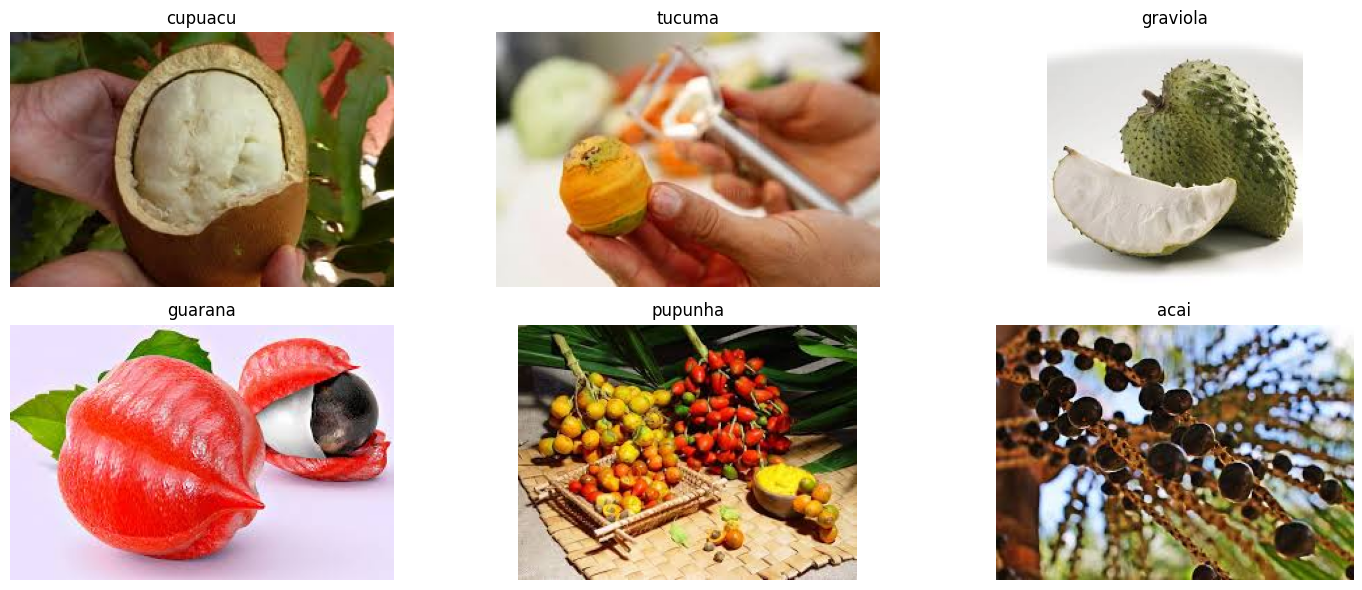

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to your dataset
train_dir = "/content/FruitinAmazon/train"

# Get class directories
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
images = []
labels = []
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    files = [f for f in os.listdir(class_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    if files:
        img_path = os.path.join(class_path, random.choice(files))
        images.append(Image.open(img_path))
        labels.append(cls)

# Display images in 2 rows
cols = (len(images) + 1) // 2
fig, axes = plt.subplots(2, cols, figsize=(15, 6))
axes = axes.flatten()

for i, img in enumerate(images):
    axes[i].imshow(img)
    axes[i].set_title(labels[i])
    axes[i].axis("off")

# Hide empty subplots
for i in range(len(images), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Check for Corrupted Image:
 Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No
Corrupted Images Found.”

• Hint:
– Iterate through each class subdirectory and check if each image is valid.

– Use the Image.open() function to attempt to load each image.

– If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from
the directory and print f"Removed corrupted image: {image_path}".

– Maintain a list of all corrupted image paths for reporting.
• Expected Output: No corrupted images found.

In [4]:
import os
from PIL import Image, UnidentifiedImageError
# List to store corrupted image paths
corrupted = []

# Loop through each class folder
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            with Image.open(img_path) as img:
                img.verify()  # Check for corruption
        except (UnidentifiedImageError, IOError, SyntaxError):
            corrupted.append(img_path)
            os.remove(img_path)
            print(f"Removed corrupted image: {img_path}")

# Final result
if not corrupted:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


# Loading and Preprocessing Image Data in keras:

In [5]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset="training",
seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset="validation",
seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Implement a CNN

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

#get number of classes from train directory
num_classes = len(os.listdir(train_dir))

model = tf.keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D((2,2), strides = 2),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), strides = 2),

    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes, activation= 'softmax')
])

# Task 4: Compile the Model and Train the model

In [8]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=250, batch_size = 16)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 524ms/step - accuracy: 1.0000 - loss: 5.3260e-04 - val_accuracy: 0.8889 - val_loss: 0.4452
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.9566 - loss: 0.1286 - val_accuracy: 0.9444 - val_loss: 0.0674
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 782ms/step - accuracy: 0.9449 - loss: 0.0990 - val_accuracy: 0.8333 - val_loss: 0.2249
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 752ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8333 - val_loss: 1.2858
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 428ms/step - accuracy: 1.0000 - loss: 0.0272 - val_accuracy: 0.8333 - val_loss: 1.3025
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.8889 - val_loss: 0.5248
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 0.9891 - loss: 0.0433 - val_accuracy: 0.9444 - val_loss: 0.1911
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 1.0000 - loss: 0.0253 - val_accuracy: 0.8889

# Task 5: Evaluate the Model
# Task 6: Save and Load the Model

In [9]:
test_dir = "/content/FruitinAmazon/test"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=(128,128), batch_size=32).map(lambda x, y: (rescale(x), y))

model.save("best_model.h5")
model = tf.keras.models.load_model('best_model.h5')
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")

Found 30 files belonging to 6 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.6000 - loss: 2.2256
Test Accuracy: 60.00%


# Task 7: Predictions and Classification Report

In [10]:
from sklearn.metrics import classification_report
y_true = []
y_pred = []

for images, labels in test_ds:
  y_true.extend(labels.numpy())

  predections = model.predict(images)
  y_pred.extend(np.argmax(predections, axis=1))

class_names = sorted([d for d in os.listdir(test_dir)
                   if os.path.isdir(os.path.join(test_dir, d))])

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.67      0.80      0.73         5
     cupuacu       0.40      0.80      0.53         5
    graviola       0.80      0.80      0.80         5
     guarana       0.50      0.40      0.44         5
     pupunha       0.67      0.40      0.50         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.60        30
   macro avg       0.67      0.60      0.60        30
weighted avg       0.67      0.60      0.60        30

